# Original

In [ ]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_320 = '/content/drive/MyDrive/data/320x240/original'
original_organik = '/content/drive/MyDrive/data/320x240/original/organik'
original_anorganik = '/content/drive/MyDrive/data/320x240/original/anorganik'
print(f"Terdapat {len(os.listdir(original_organik))} gambar dari sampah organik")
print(f"Terdapat {len(os.listdir(original_anorganik))} gambar dari sampah anorganik")

Terdapat 130 gambar dari sampah organik
Terdapat 88 gambar dari sampah anorganik


# Augmented Images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img

In [ ]:
original_organik = '/content/drive/MyDrive/data/320x240/original/organik'
original_anorganik = '/content/drive/MyDrive/data/320x240/original/anorganik'

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.025,
    height_shift_range=0.025,
    zoom_range=0.025,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_dir, output_dir, target_count):
    images = os.listdir(input_dir)
    current_count = len(images)
    if current_count >= target_count:
        print(f"Jumlah gambar sudah cukup di {input_dir}")
        return

    os.makedirs(output_dir, exist_ok=True)

    for image_name in images:
        img_path = os.path.join(input_dir, image_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)  # Mengubah menjadi bentuk (1, height, width, channels)

        # Menyimpan gambar hasil augmentasi
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpg'):
            i += 1
            if i >= target_count // current_count:
                break

augment_images(original_organik, '/content/drive/MyDrive/data/320x240/augmented/organik', 500)
augment_images(original_anorganik, '/content/drive/MyDrive/data/320x240/augmented/anorganik', 500)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Direktori gambar
original_organik = '/content/drive/MyDrive/data/320x240/original/organik'
original_anorganik = '/content/drive/MyDrive/data/320x240/original/anorganik'

# Membuat ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.025,
    height_shift_range=0.025,
    zoom_range=0.025,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_dir, output_dir, target_count, datagen):
    images = os.listdir(input_dir)
    augmented_count = len(os.listdir(output_dir))

    # Jika sudah mencapai target, tidak perlu augmentasi lagi
    if augmented_count >= target_count:
        print(f"Jumlah gambar sudah mencapai target di {output_dir}")
        return

    os.makedirs(output_dir, exist_ok=True)

    # Menggunakan gambar asli untuk augmentasi hingga habis
    while augmented_count < target_count:
        for image_name in images:
            img_path = os.path.join(input_dir, image_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)  # Mengubah menjadi bentuk (1, height, width, channels)

            # Menyimpan gambar hasil augmentasi
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpg'):
                augmented_count += 1
                i += 1
                if augmented_count >= target_count or i >= (target_count // len(images)):
                    break
            if augmented_count >= target_count:
                break
        images = os.listdir(output_dir)  # Gunakan gambar hasil augmentasi untuk iterasi berikutnya

# Mengaugmentasi gambar organik hingga mencapai 500
augment_images(original_organik, '/content/drive/MyDrive/data/320x240/augmented/organik', 500, datagen)

# Mengaugmentasi gambar anorganik hingga mencapai 500
augment_images(original_anorganik, '/content/drive/MyDrive/data/320x240/augmented/anorganik', 500, datagen)


Jumlah gambar sudah mencapai target di /content/drive/MyDrive/data/320x240/augmented/organik


In [ ]:
augmented_320 = '/content/drive/MyDrive/data/320x240/augmented'
augmented_organik = '/content/drive/MyDrive/data/320x240/augmented/organik'
augmented_anorganik = '/content/drive/MyDrive/data/320x240/augmented/anorganik'
print(f"Terdapat {len(os.listdir(augmented_organik))} augmented gambar dari sampah organik")
print(f"Terdapat {len(os.listdir(augmented_anorganik))} augmented gambar dari sampah anorganik")

Terdapat 751 augmented gambar dari sampah organik
Terdapat 666 augmented gambar dari sampah anorganik


In [ ]:
import os
import random

def remove_random_images(directory, target_count):
    # Dapatkan daftar semua gambar di direktori
    images = os.listdir(directory)

    # Hitung jumlah gambar yang harus dihapus
    current_count = len(images)
    remove_count = current_count - target_count

    if remove_count <= 0:
        print(f"Jumlah gambar di {directory} sudah sesuai atau kurang dari target.")
        return

    # Pilih gambar secara acak untuk dihapus
    images_to_remove = random.sample(images, remove_count)

    # Hapus gambar yang dipilih
    for image in images_to_remove:
        os.remove(os.path.join(directory, image))
    print(f"{remove_count} gambar telah dihapus dari {directory}")

# Direktori gambar
augmented_organik = '/content/drive/MyDrive/data/320x240/augmented/organik'
augmented_anorganik = '/content/drive/MyDrive/data/320x240/augmented/anorganik'

# Hapus gambar secara acak hingga tersisa 500
remove_random_images(augmented_organik, 500)
remove_random_images(augmented_anorganik, 500)

251 gambar telah dihapus dari /content/drive/MyDrive/data/320x240/augmented/organik
166 gambar telah dihapus dari /content/drive/MyDrive/data/320x240/augmented/anorganik


In [ ]:
augmented_320 = '/content/drive/MyDrive/data/320x240/augmented'
augmented_organik = '/content/drive/MyDrive/data/320x240/augmented/organik'
augmented_anorganik = '/content/drive/MyDrive/data/320x240/augmented/anorganik'
print(f"Terdapat {len(os.listdir(augmented_organik))} augmented gambar dari sampah organik")
print(f"Terdapat {len(os.listdir(augmented_anorganik))} augmented gambar dari sampah anorganik")

Terdapat 500 augmented gambar dari sampah organik
Terdapat 500 augmented gambar dari sampah anorganik


# Splitting Dataset

In [ ]:
root_dir = '/content/drive/MyDrive/data/320x240/classification'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  ### START CODE HERE
  train_path = os.path.join(root_dir, "training")
  os.makedirs(train_path)
  path_1 = os.path.join(train_path, "organik")
  os.makedirs(path_1)
  path_2 = os.path.join(train_path, "anorganik")
  os.makedirs(path_2)
  val_path = os.path.join(root_dir, "validation")
  os.makedirs(val_path)
  path_3 = os.path.join(val_path, "organik")
  os.makedirs(path_3)
  path_4 = os.path.join(val_path, "anorganik")
  os.makedirs(path_4)
  pass

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/data/320x240/classification/training
/content/drive/MyDrive/data/320x240/classification/validation
/content/drive/MyDrive/data/320x240/classification/training/organik
/content/drive/MyDrive/data/320x240/classification/training/anorganik
/content/drive/MyDrive/data/320x240/classification/validation/organik
/content/drive/MyDrive/data/320x240/classification/validation/anorganik


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)

  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)
  pass

In [ ]:
organik_aug_dir = '/content/drive/MyDrive/data/320x240/augmented/organik/'
anorganik_aug_dir = '/content/drive/MyDrive/data/320x240/augmented/anorganik/'

training_dir = '/content/drive/MyDrive/data/320x240/classification/training/'
validation_dir = '/content/drive/MyDrive/data/320x240/classification/validation/'

training_organik = os.path.join(training_dir, "organik/")
validation_organik = os.path.join(validation_dir, "organik/")

training_anorganik = os.path.join(training_dir, "anorganik/")
validation_anorganik = os.path.join(validation_dir, "anorganik/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(training_organik)) > 0:
  for file in os.scandir(training_organik):
    os.remove(file.path)
if len(os.listdir(training_anorganik)) > 0:
  for file in os.scandir(training_anorganik):
    os.remove(file.path)
if len(os.listdir(validation_organik)) > 0:
  for file in os.scandir(validation_organik):
    os.remove(file.path)
if len(os.listdir(validation_anorganik)) > 0:
  for file in os.scandir(validation_anorganik):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(organik_aug_dir, training_organik, validation_organik, split_size)
split_data(anorganik_aug_dir, training_anorganik, validation_anorganik, split_size)

# Check that the number of images matches the expected output
print(f"Terdapat {len(os.listdir(training_organik))} gambar sampah organik untuk training")
print(f"Terdapat {len(os.listdir(training_anorganik))} gambar sampah anorganik untuk training")
print(f"Terdapat {len(os.listdir(validation_organik))} gambar sampah organik untuk validation")
print(f"Terdapat {len(os.listdir(validation_anorganik))} gambar sampah anorganik untuk validation")

Terdapat 400 gambar sampah organik untuk training
Terdapat 400 gambar sampah anorganik untuk training
Terdapat 100 gambar sampah organik untuk validation
Terdapat 100 gambar sampah anorganik untuk validation


# Split to 2 Classes

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1.0/255.)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='binary',
                                                      target_size=(160, 160))

  validation_datagen = ImageDataGenerator(rescale=1.0/255.)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(160, 160))
  return train_generator, validation_generator

In [ ]:
training_dir = '/content/drive/MyDrive/data/320x240/classification/training/'
validation_dir = '/content/drive/MyDrive/data/320x240/classification/validation/'
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Model

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
7/7 [==============================] - 51s 7s/step - loss: 0.6970 - accuracy: 0.4825 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 23s 3s/step - loss: 0.6846 - accuracy: 0.5450 - val_loss: 0.6637 - val_accuracy: 0.5300
Epoch 3/15
7/7 [==============================] - 24s 3s/step - loss: 0.6055 - accuracy: 0.7262 - val_loss: 0.4319 - val_accuracy: 0.8950
Epoch 4/15
7/7 [==============================] - 24s 4s/step - loss: 0.4413 - accuracy: 0.7887 - val_loss: 0.3513 - val_accuracy: 0.7900
Epoch 5/15
7/7 [==============================] - 23s 3s/step - loss: 0.2507 - accuracy: 0.8938 - val_loss: 0.1633 - val_accuracy: 0.9250
Epoch 6/15
7/7 [==============================] - 25s 3s/step - loss: 0.1582 - accuracy: 0.9312 - val_loss: 0.2367 - val_accuracy: 0.9150
Epoch 7/15
7/7 [==============================] - 22s 4s/step - loss: 0.1162 - accuracy: 0.9600 - val_loss: 0.1737 - val_accuracy: 0.8950
Epoch 8/15
7/7 [==================

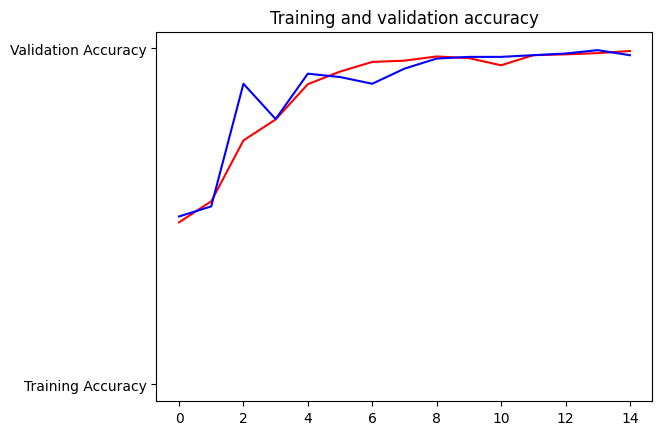

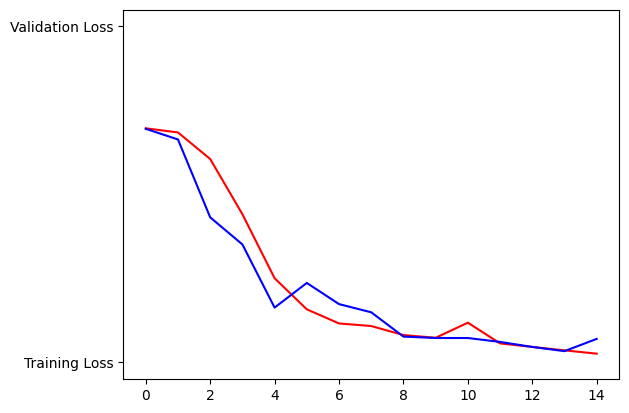

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
model.save("waste-classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('waste-classification.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('waste-classification.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving 20240528142010.jpg to 20240528142010 (1).jpg
1/1 [==============================] - 0s 39ms/step
anorganik


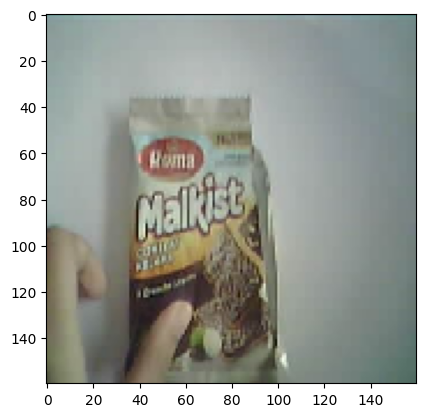

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(160,160))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  if classes[0] > 0.5:
    print('organik')
  else:
    print('anorganik')

In [ ]:
# for sk-learn
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import joblib
class_indices = train_generator.class_indices
joblib.dump(class_indices, 'class_indices.joblib')

['class_indices.joblib']